In [117]:
!pip3 install matplotlib > /dev/null

Request is:
`python benchmarks/benchmark_serving.py --backend vllm --model meta-llama/Meta-Llama-3.1-70B-Instruct --dataset-name sharegpt --dataset-path /Users/mihirpandya/scratch/ShareGPT_V3_unfiltered_cleaned_split.json --base-url http://localhost:8008 --request-rate 1 --num-prompts 20 --save-result`

In [212]:
import json
files = [
    # FIRST BATCH, no prompt length normalization 
    # {
    #     "filepath": "../inference-benchmark-vllm-1.0qps-Meta-Llama-3.1-70B-Instruct-20241002-190746.json",
    #     "qps": 1,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-5.0qps-Meta-Llama-3.1-70B-Instruct-20241002-191607.json",
    #     "qps": 5,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-10.0qps-Meta-Llama-3.1-70B-Instruct-20241002-192103.json",
    #     "qps": 10,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241002-192433.json",
    #     "qps": 20,
    #     "istio_enabled": False
    # },
    # SECOND BATCH, prompt normalization
    # {
    #     "filepath": "../inference-benchmark-vllm-1.0qps-Meta-Llama-3.1-70B-Instruct-20241002-203356.json",
    #     "qps": 1,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-5.0qps-Meta-Llama-3.1-70B-Instruct-20241002-203730.json",
    #     "qps": 5,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-10.0qps-Meta-Llama-3.1-70B-Instruct-20241002-204023.json",
    #     "qps": 10,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241002-204312.json",
    #     "qps": 20,
    #     "istio_enabled": False
    # } 
    #THIRD BATCH
    # {
    #     "filepath": "../inference-benchmark-vllm-1.0qps-Meta-Llama-3.1-70B-Instruct-20241002-225449.json",
    #     "qps": 1,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-5.0qps-Meta-Llama-3.1-70B-Instruct-20241002-225545.json",
    #     "qps": 5,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-10.0qps-Meta-Llama-3.1-70B-Instruct-20241002-225732.json",
    #     "qps": 10,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241002-225915.json",
    #     "qps": 20,
    #     "istio_enabled": False
    # }
    #FOURTH BATCH (No istio, only llama3.1, correct baseline)
    # {
    #     "filepath": "../inference-benchmark-vllm-1.0qps-Meta-Llama-3.1-70B-Instruct-20241002-234813.json",
    #     "qps": 1,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-5.0qps-Meta-Llama-3.1-70B-Instruct-20241002-235227.json",
    #     "qps": 5,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-10.0qps-Meta-Llama-3.1-70B-Instruct-20241002-235715.json",
    #     "qps": 10,
    #     "istio_enabled": False
    # },
    # {
    #     "filepath": "../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241003-000201.json",
    #     "qps": 20,
    #     "istio_enabled": False
    # }
    # FIFTH BATCH (Istio enabled, only llama3.1)
    {
        "filepath": "../inference-benchmark-vllm-1.0qps-Meta-Llama-3.1-70B-Instruct-20241003-144757.json",
        "qps": 1,
        "istio_enabled": True
    },
    {
        "filepath": "../inference-benchmark-vllm-5.0qps-Meta-Llama-3.1-70B-Instruct-20241003-150153.json",
        "qps": 5,
        "istio_enabled": True
    },
    {
        "filepath": "../inference-benchmark-vllm-10.0qps-Meta-Llama-3.1-70B-Instruct-20241003-151500.json",
        "qps": 10,
        "istio_enabled": True
    },
    {
        "filepath": "../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241003-152927.json",
        "qps": 20,
        "istio_enabled": True
    }
]
for idx, file in enumerate(files):
    with open(file["filepath"], 'r') as file:
        output = file.read()
        files[idx]["results"] = json.loads(output)


In [214]:
with open("../inference-benchmark-vllm-20.0qps-Meta-Llama-3.1-70B-Instruct-20241003-152927.json", 'r') as file:
    output = file.read()
    ff = json.loads(output)
print(ff["start_time"], "\n", ff["end_time"])

2024-10-03 15:27:10 PDT-0700 
 2024-10-03 15:29:27 PDT-0700


Latency chart, raw data

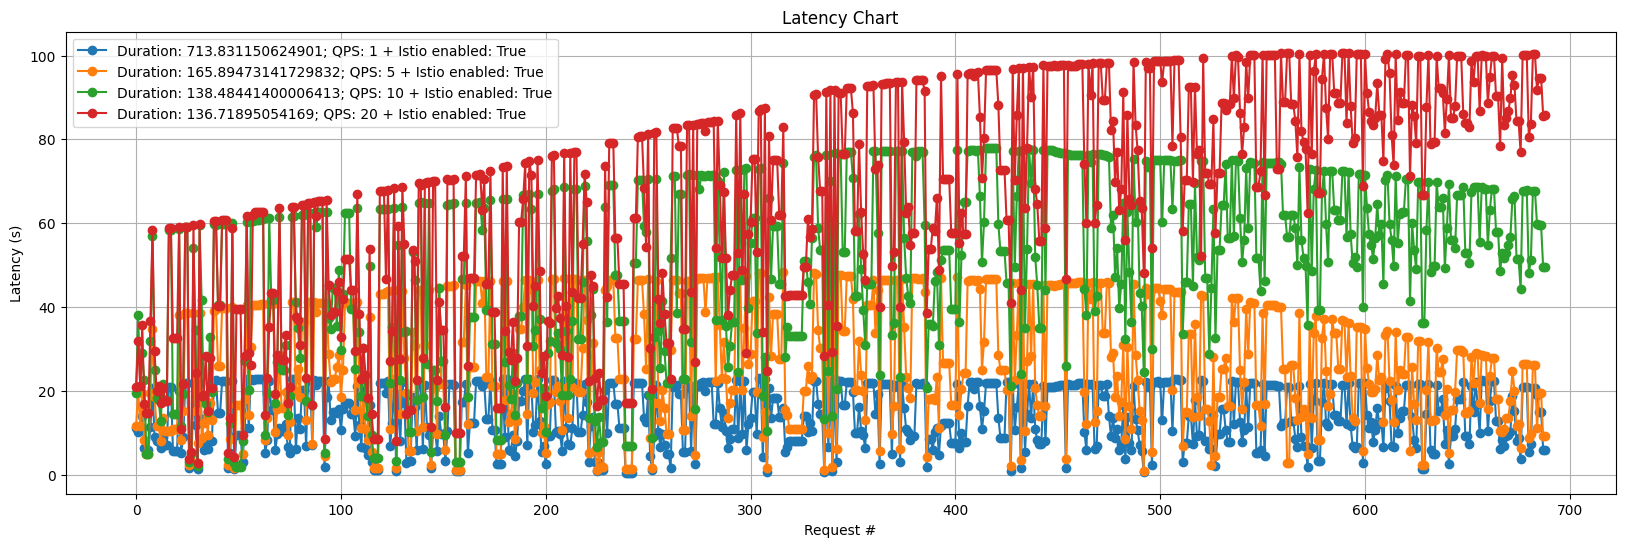

In [215]:
import matplotlib.pyplot as plt

labels = [idx for idx in range(len(files[0]["results"]["outputs"]))] #Ran experiments w/ 2k prompts

plt.figure(figsize=(20, 6))

for idx, file in enumerate(files[:]):
    results = file["results"]
    values = []
    for result_idx, blob in enumerate(results["outputs"]):
        if len(blob["generated_text"].strip()) < 20:
            values.append(values[-1])
        else:
            values.append(blob["latency"])
    plt.plot(labels, values, marker='o', label=f"Duration: {results['duration']}; QPS: {file['qps']} + Istio enabled: {file['istio_enabled']}")

plt.title('Latency Chart')
plt.xlabel('Request #')
plt.ylabel('Latency (s)')
plt.grid(True)
plt.legend()
plt.show()

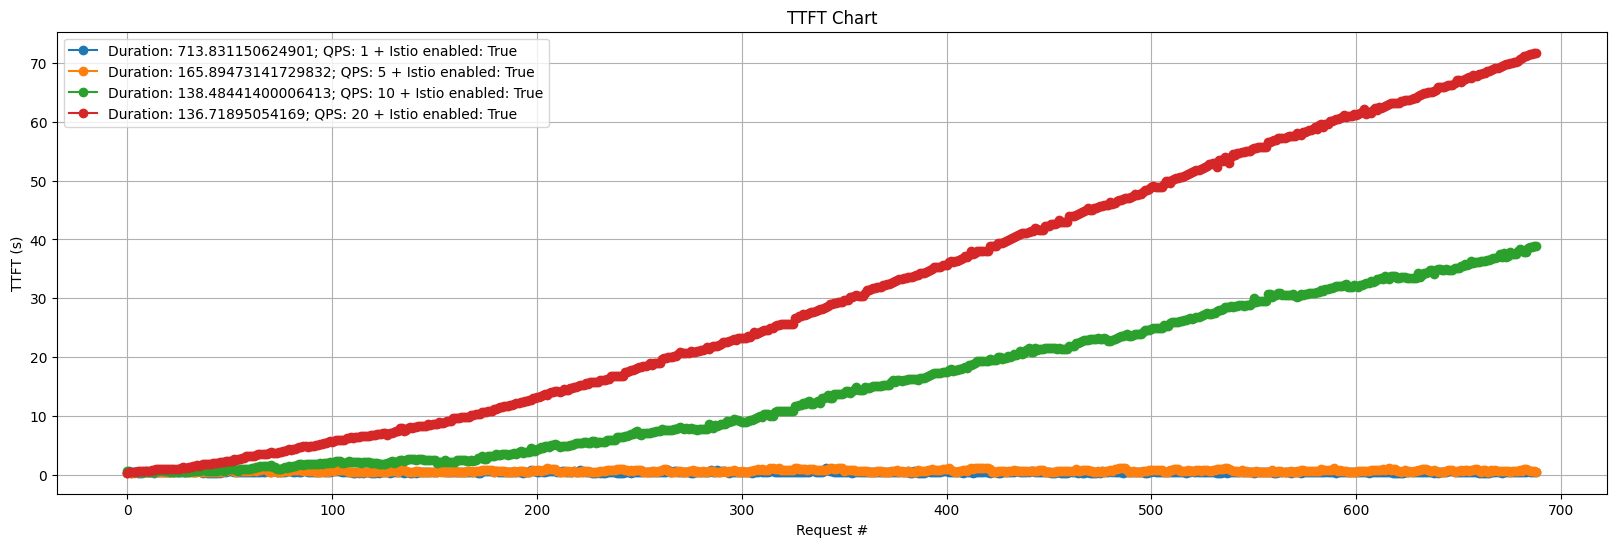

In [216]:
import matplotlib.pyplot as plt

labels = [idx for idx in range(len(files[0]["results"]["outputs"]))] #Ran experiments w/ 2k prompts

plt.figure(figsize=(20, 6))

for idx, file in enumerate(files[:]):
    results = file["results"]
    values = []
    for result_idx, blob in enumerate(results["outputs"]):
        if len(blob["generated_text"].strip()) < 20:
            values.append(values[-1])
        else:
            values.append(blob["ttft"])
    plt.plot(labels, values, marker='o', label=f"Duration: {results['duration']}; QPS: {file['qps']} + Istio enabled: {file['istio_enabled']}")

plt.title('TTFT Chart')
plt.xlabel('Request #')
plt.ylabel('TTFT (s)')
plt.grid(True)
plt.legend()
plt.show()

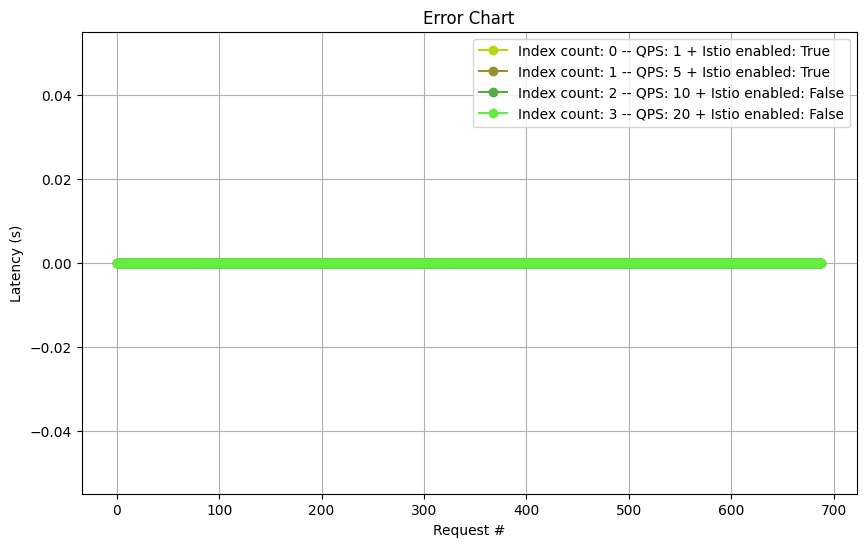

In [211]:
import matplotlib.pyplot as plt
import random

def random_color():
    return (random.random(), random.random(), random.random())

labels = [idx for idx in range(len(files[0]["results"]["outputs"]))] #Ran experiments w/ 2k prompts

plt.figure(figsize=(10, 6))

for idx, file in enumerate(files):
    results = file["results"]
    plt.plot(labels, [0 if blob["success"] else 1 for blob in results["outputs"]], marker='o', label=f"Index count: {idx} -- QPS: {file['qps']} + Istio enabled: {file['istio_enabled']}", color=random_color())

plt.title('Error Chart')
plt.xlabel('Request #')
plt.ylabel('Latency (s)')
plt.grid(True)
plt.legend()
plt.show()